In [1]:
import pandas as pd

df = pd.read_csv("customer_support_tickets.csv")

# Explore the data to get more insight of the dataset
The dataset is the tickets from the customers. The structure of the dataset: 
- Ticket ID: A unique identifier for each ticket.
- Customer Name: The name of the customer who raised the ticket.
- Customer Email: The email address of the customer (Domain name - @example.com is
intentional for user data privacy concern).
- Customer Age: The age of the customer.
- Customer Gender: The gender of the customer.
- Product Purchased: The tech product purchased by the customer.
- Date of Purchase: The date when the product was purchased.
- Ticket Type: The type of ticket (e.g., technical issue, billing inquiry, product inquiry).
- Ticket Subject: The subject/topic of the ticket.
- Ticket Description: The description of the customer's issue or inquiry.
- Ticket Status: The status of the ticket (e.g., open, closed, pending customer response).
- Resolution: The resolution or solution provided for closed tickets.
- Ticket Priority: The priority level assigned to the ticket (e.g., low, medium, high, critical).
- Ticket Channel: The channel through which the ticket was raised (e.g., email, phone, chat,
social media).
- First Response Time: The time taken to provide the first response to the customer.
- Time to Resolution: The time taken to resolve the ticket.
- Customer Satisfaction Rating: The customer's satisfaction rating for closed tickets (on a scale
of 1 to 5).

Beside the description, the below code will conduct the data exploration and data cleaning

In [2]:
#Print the first 5 rows
df.head(5)

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [3]:
#The size of the dataset
len(df)

8469

In [4]:
df.describe()

,Ticket ID,Customer Age,Customer Satisfaction Rating
count,8469.000000,8469.000000,2769.000000
mean,4235.000000,44.026804,2.991333
std,2444.934048,15.296112,1.407016
min,1.000000,18.000000,1.000000
25%,2118.000000,31.000000,2.000000
50%,4235.000000,44.000000,3.000000
75%,6352.000000,57.000000,4.000000
max,8469.000000,70.000000,5.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

# Handling missing data: 
There are missing data at Resolution column, First Response Time column, Time to Resolution column, and Customer Satisfaction Rating
- The number of non-null Resolution, Time to Resolution, and CSR, are the same, from the description it might be that they are only available for closed tickets
- The null First Response Time is unknown, but it may also depends on the ticket status

In [6]:
df["Ticket Status"].value_counts()

Ticket Status
Pending Customer Response    2881
Open                         2819
Closed                       2769
Name: count, dtype: int64

In [7]:
print("Checking missing Resolution, Time to Resolution, and CSR for closed tickets")
closed_tickets = df[df["Ticket Status"] == "Closed"]
missing_res = closed_tickets["Resolution"].isna().sum()
missing_time_to_res = closed_tickets["Time to Resolution"].isna().sum()
missing_rating = closed_tickets["Customer Satisfaction Rating"].isna().sum()
print(f"Num missing Resolution: {missing_res}, Time to resolution: {missing_time_to_res}, Missing rating: {missing_rating}")


Checking missing Resolution, Time to Resolution, and CSR for closed tickets
Num missing Resolution: 0, Time to resolution: 0, Missing rating: 0


In [8]:
#First Response Time missing 
print(df[df["First Response Time"].isna()]["Ticket Status"].unique())
open_tickets = df[df["Ticket Status"] == "Open"]
print(len(df) - len(open_tickets))

['Open']
5650


- O1: There are three main type of tickets, based on Ticket Status: Pending, Open, and Closed.
- O2: Resolution, Time to Resolution and Customer Satisfaction Rating are available only for Closed ticket, and First Response Time is not available for Open tickets

# Data statistics and visualization: 
- After checking for data sanity, each column of data is explored and visualized to get more insights about customers and their behaviours


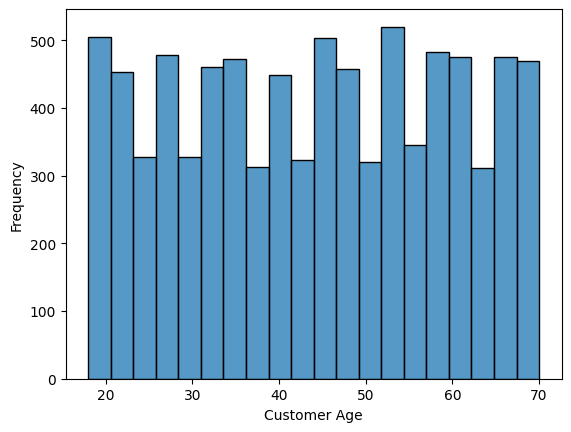

In [9]:
# Customer Age
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["Customer Age"], bins = 20)
plt.xlabel("Customer Age")
plt.ylabel("Frequency")
plt.show()

- O3: The customer age are equally distributed from 20 to 70

In [10]:
df["Customer Gender"].value_counts()

Customer Gender
Male      2896
Female    2887
Other     2686
Name: count, dtype: int64

- O4: The genders are equally distributed

In [11]:
df["Product Purchased"].value_counts()

Product Purchased
Canon EOS                         240
GoPro Hero                        228
Nest Thermostat                   225
Amazon Echo                       221
Philips Hue Lights                221
LG Smart TV                       219
Sony Xperia                       217
Roomba Robot Vacuum               216
Apple AirPods                     213
LG OLED                           213
iPhone                            212
Sony 4K HDR TV                    210
LG Washing Machine                208
Garmin Forerunner                 208
Canon DSLR Camera                 206
Nikon D                           204
Nintendo Switch Pro Controller    203
Google Pixel                      203
Fitbit Charge                     202
Sony PlayStation                  202
Microsoft Office                  200
HP Pavilion                       200
Amazon Kindle                     198
Dyson Vacuum Cleaner              198
Google Nest                       198
Bose SoundLink Speaker          

- O5: The purchased products are electronic devices. The distribution is pretty balanced. 

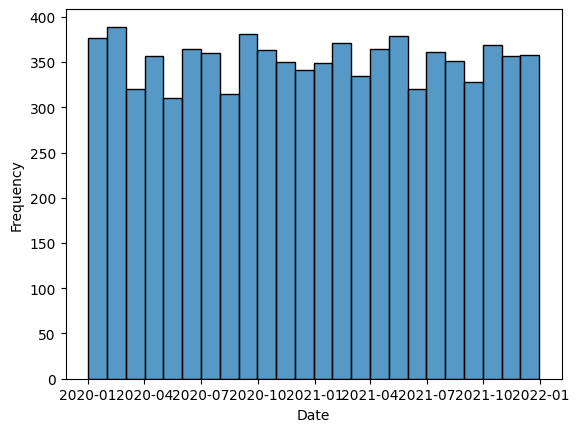

In [12]:
df["Date of Purchase"] = pd.to_datetime(df["Date of Purchase"])
df["Date of Purchase"].describe()

sns.histplot(df["Date of Purchase"], bins = 24)
plt.xlabel("Date")
plt.ylabel("Frequency")
plt.show()

- O6: The dates of purchases of the tickets range from the beginning of 2020 to the end of 2021

In [13]:
df["Ticket Type"].value_counts()

Ticket Type
Refund request          1752
Technical issue         1747
Cancellation request    1695
Product inquiry         1641
Billing inquiry         1634
Name: count, dtype: int64

In [14]:
df["Ticket Subject"].value_counts()

Ticket Subject
Refund request              576
Software bug                574
Product compatibility       567
Delivery problem            561
Hardware issue              547
Battery life                542
Network problem             539
Installation support        530
Product setup               529
Payment issue               526
Product recommendation      517
Account access              509
Peripheral compatibility    496
Data loss                   491
Cancellation request        487
Display issue               478
Name: count, dtype: int64

- O7: There are 5 types of tickets, corresponding to the users requests: Refund, Technical Issue, Cancellation, Product Inquiry, and Billing Inquiry

In [15]:
print(df[df["Ticket Type"] == "Refund request"]["Ticket Subject"].unique())
print(df[df["Ticket Type"] == "Technical issue"]["Ticket Subject"].unique())
print(df[df["Ticket Type"] == "Cancellation request"]["Ticket Subject"].unique())
print(df[df["Ticket Type"] == "Product inquiry"]["Ticket Subject"].unique())
print(df[df["Ticket Type"] == "Billing inquiry"]["Ticket Subject"].unique())

['Battery life' 'Payment issue' 'Software bug' 'Hardware issue'
 'Installation support' 'Product compatibility' 'Network problem'
 'Peripheral compatibility' 'Refund request' 'Delivery problem'
 'Product recommendation' 'Display issue' 'Data loss'
 'Cancellation request' 'Account access' 'Product setup']
['Product setup' 'Peripheral compatibility' 'Network problem'
 'Installation support' 'Hardware issue' 'Refund request'
 'Product recommendation' 'Product compatibility' 'Account access'
 'Software bug' 'Display issue' 'Battery life' 'Delivery problem'
 'Cancellation request' 'Data loss' 'Payment issue']
['Payment issue' 'Data loss' 'Installation support' 'Delivery problem'
 'Product setup' 'Cancellation request' 'Product recommendation'
 'Network problem' 'Software bug' 'Peripheral compatibility'
 'Account access' 'Battery life' 'Hardware issue' 'Refund request'
 'Product compatibility' 'Display issue']
['Refund request' 'Software bug' 'Account access' 'Payment issue'
 'Peripheral com

- O8: Some Ticket Subject can correspond to different Ticket Type

In [16]:
for subject in df["Ticket Subject"].unique():
    descriptions = df[df["Ticket Subject"] == subject].head(5)["Ticket Description"]
    print(f"Some example for: {subject}")
    for d in descriptions:
        print("----------------------------------------------------------------------------------------")
        print(d)                
    print("============================================================================================")
        

Some example for: Product setup
----------------------------------------------------------------------------------------
I'm having an issue with the {product_purchased}. Please assist.

Your billing zip code is: 71701.

We appreciate that you have requested a website address.

Please double check your email address. I've tried troubleshooting steps mentioned in the user manual, but the issue persists.
----------------------------------------------------------------------------------------
I've recently set up my {product_purchased}, but it fails to connect to any available networks. What steps should I take to troubleshoot this issue?

I can't find the 'Product_IP' field of the I'm concerned about the security of my {product_purchased} and would like to ensure that my data is safe.
----------------------------------------------------------------------------------------
I'm having an issue with the {product_purchased}. Please assist.

Product Name: TPUBASK3E3KQ0


Join Date: Oct 2007 P

- O9: Most of ticket’s content is concise yet clear, allowing it to be categorized by subject. However, some tickets seem to be spam, and some includes code injection.

In [17]:
df["Ticket Priority"].value_counts()

Ticket Priority
Medium      2192
Critical    2129
High        2085
Low         2063
Name: count, dtype: int64

In [18]:
df["Ticket Channel"].value_counts()

Ticket Channel
Email           2143
Phone           2132
Social media    2121
Chat            2073
Name: count, dtype: int64

- O10: The distribution of ticket priority and ticket channel are quite balanced

In [19]:
#Study the customer rating on closed ticket
df_closed = df[df["Ticket Status"] == "Closed"].copy()
df_closed["First Response Time"] = pd.to_datetime(df_closed["First Response Time"])
df_closed["Time to Resolution"] = pd.to_datetime(df_closed["Time to Resolution"])
df_closed["Processed Time"] = df_closed["Time to Resolution"] - df_closed["First Response Time"]
df_closed["Processed Time"] = df_closed["Processed Time"].dt.total_seconds() / 3600

<Axes: >

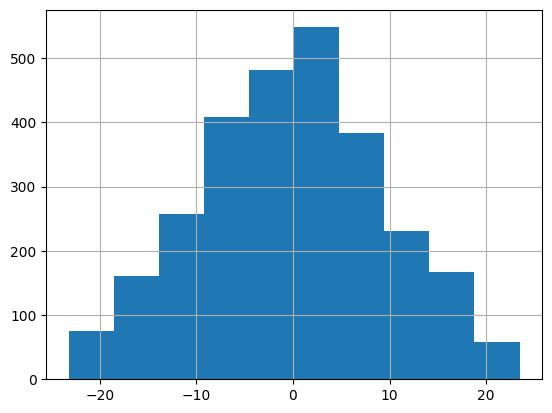

In [20]:
df_closed["Processed Time"].hist()

- O11: It seems that the Time to Resolution can be either before or after the First Response Time

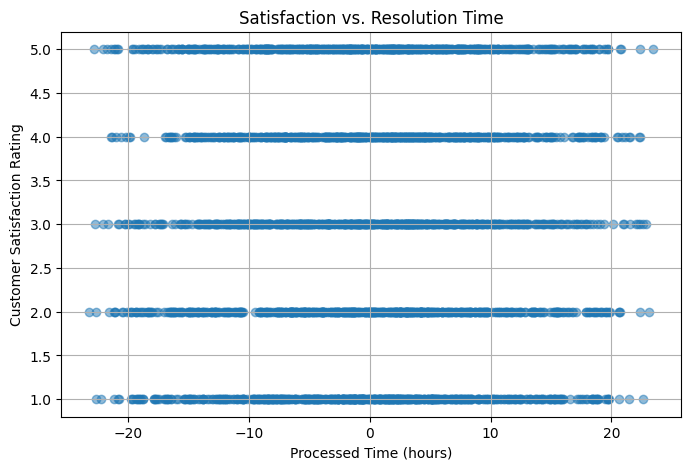

In [21]:
plt.figure(figsize=(8, 5))
plt.scatter(df_closed["Processed Time"],  
            df_closed["Customer Satisfaction Rating"],
            alpha=0.5)
plt.xlabel("Processed Time (hours)")
plt.ylabel("Customer Satisfaction Rating")
plt.title("Satisfaction vs. Resolution Time")
plt.grid(True)
plt.show()

- O12: It seems that the interval between First Response Time and Time to Resolution does not affect much customer satisfaction

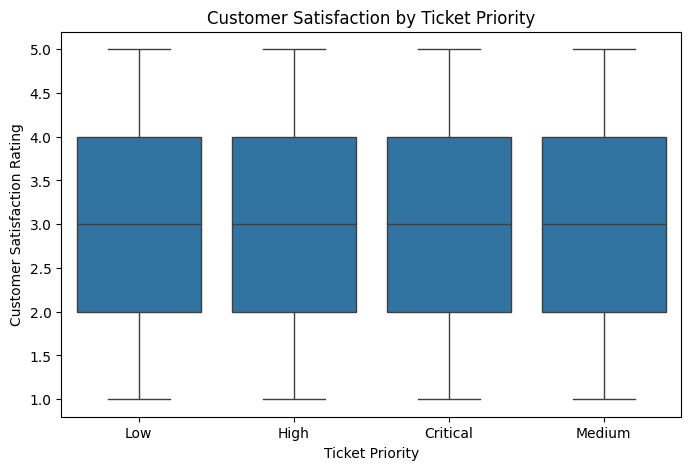

In [22]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Ticket Priority", y="Customer Satisfaction Rating", data=df_closed)
plt.title("Customer Satisfaction by Ticket Priority")
plt.show()


In [23]:
df_closed.groupby("Ticket Priority")["Customer Satisfaction Rating"].value_counts().unstack(fill_value=0)


Customer Satisfaction Rating,1.0,2.0,3.0,4.0,5.0
Ticket Priority,,,,,
Critical,152,146,149,138,141
High,147,142,140,128,148
Low,119,127,124,149,125
Medium,135,134,167,128,130


- O13: There are no significant difference between the customer satisfaction level between different type of ticket priority

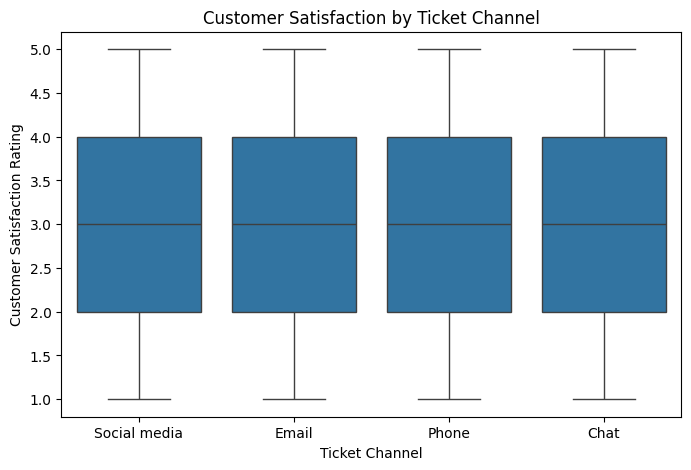

In [24]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Ticket Channel", y="Customer Satisfaction Rating", data=df_closed)
plt.title("Customer Satisfaction by Ticket Channel")
plt.show()


In [25]:
df_closed.groupby("Ticket Channel")["Customer Satisfaction Rating"].value_counts().unstack(fill_value=0)


Customer Satisfaction Rating,1.0,2.0,3.0,4.0,5.0
Ticket Channel,,,,,
Chat,125,120,149,134,146
Email,148,155,132,145,140
Phone,149,136,140,131,135
Social media,131,138,159,133,123


- O14: The same phenomenon can be seen with different ticket channel

In [27]:
df_closed["Customer Satisfaction Rating"].value_counts()

Customer Satisfaction Rating
3.0    580
1.0    553
2.0    549
5.0    544
4.0    543
Name: count, dtype: int64

# Insight summary:
- The dataset contains 8469 customer support tickets related to purchases made at an electronics store from January 2020 to December 2021.
- The customers' ages are evenly distributed between 20 and 70, and their gender is also evenly distributed.
- The products are electronic devices used for entertainment (e.g., gaming consoles, cameras), work (e.g., laptops, office software), and household purposes (e.g., TVs, vacuum cleaners).
- There are five ticket types: Refund Request, Technical Issue, Cancellation Request, Product Inquiry, and Billing Inquiry. Additionally, there are 16 ticket subjects that summarize customer needs, and each subject can appear across different ticket types.
- There are three ticket statuses: Open, Closed, and Pending. Resolution, Time to Resolution, and Customer Rating are only available for Closed tickets, and First Response Time is only available for Pending and Closed tickets
- The Time to Resolution can occur either before or after the First Response Time, and at first glance, the interval between them does not significantly affect the customer rating.
- Most of ticket’s description content is concise yet clear, allowing it to be categorized by subject. However, some tickets seem to be spam, and some includes code injection.
- There are 4 levels of ticket priority: Critical, High, Medium and Low, distributed equally. No significant customer satisfaction level can be seen between different levels of priority. Spam and injected tickets might be assigned as low priority.
- The tickets come from 4 channels: Chat, Email, Phone, and Social media, distributed equally. No significant customer satisfaction level can be seen between the channels.
- Customer satisfaction levels are also fairly evenly distributed. It appears that the content of the ticket description plays an important role in determining or predicting customer satisfaction.